[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/04_Weight_Initialization_MNIST_Classificaiton_.ipynb)

In [52]:
!git clone https://github.com/Intoli/intoli-article-materials.git

Cloning into 'intoli-article-materials'...
remote: Counting objects: 391, done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 391 (delta 52), reused 79 (delta 23), pack-reused 280
Receiving objects: 100% (391/391), 350.36 KiB | 10.95 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [53]:
cd intoli-article-materials/articles/neural-network-initialization


/content/intoli-article-materials/articles/neural-network-initialization/intoli-article-materials/articles/neural-network-initialization/intoli-article-materials/articles/neural-network-initialization


In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
%matplotlib inline

In [0]:
from utils import (compile_model, create_mlp_model, get_activations, grid_axes_it,get_init_id, LossHistory,create_cnn_model)

In [0]:
seed = 10

n_train = 1000
n_test = 100
n_classes = 10

n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 30

n_train = 60000
n_test = 10000

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28*28

In [0]:
x_train = x_train.reshape(60000,784).astype('float32')[:n_train]
x_test = x_test.reshape(10000,784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Linear Function Sigma Compare

compare different settings of sigma by deploying a simle linear function

In [0]:
rows =[]
sigmas = [0.05, 0.10, 0.20,0.3]
for stddev in sigmas:
  init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
  activation = 'linear'
  
  model = create_mlp_model(n_hidden_layers,
                          dim_layer,
                          (data_dim,),
                          n_classes,
                          init,
                          'zeros',
                          activation)
  compile_model(model)
  output_elts = get_activations(model, x_test)
  n_layers = len(model.layers)
  i_output_layer = n_layers - 1
  
  for i, out in enumerate(output_elts[:-1]):
    if i>0 and i != i_output_layer:
      for out_i in out.ravel()[::20]:
        rows.append([i, stddev, out_i])

In [0]:
df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


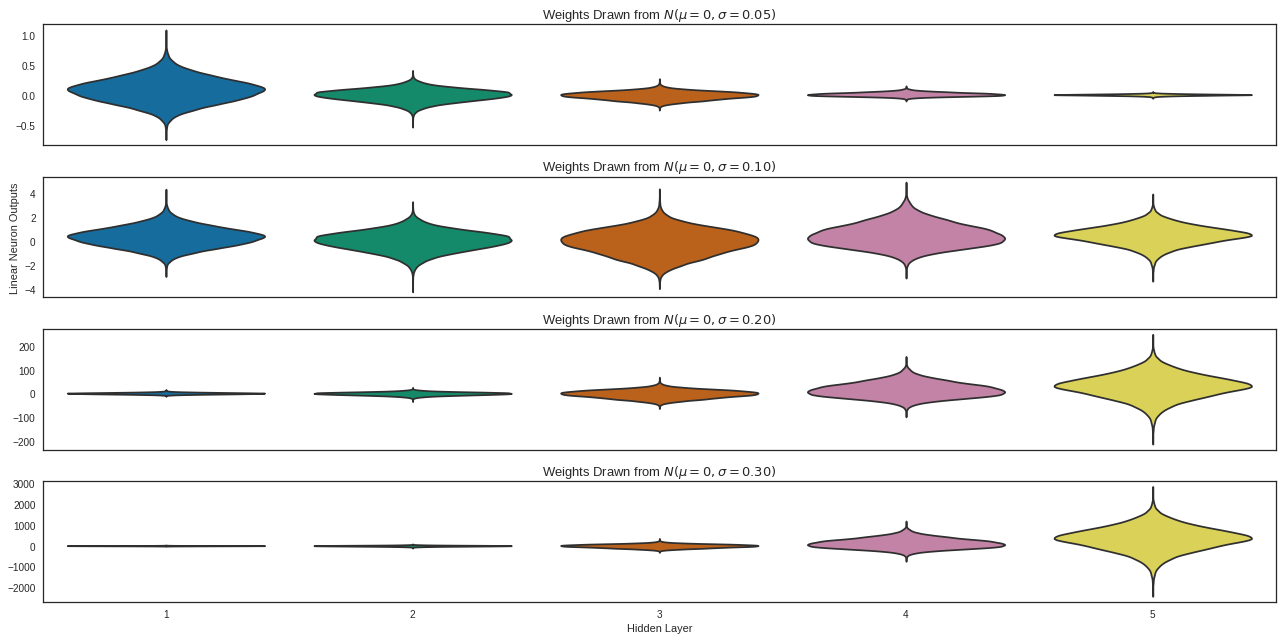

In [40]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18,9))
axes = grid_axes_it(len(sigmas),1, fig=fig)
for sig in sigmas:
  ax = next(axes)
  ddf = df[df['Standard Deviation']==sig]
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count',inner=None)
  
  ax.set_xlabel('')
  ax.set_ylabel('')
  
  ax.set_title('Weights Drawn from $N(\mu=0, \sigma={%.2f})$' % sig, fontsize=13)
  
  if sig == sigmas[1]:
    ax.set_ylabel("Linear Neuron Outputs")
  if sig != sigmas[-1]:
    ax.set_xticklabels(())
  else:
    ax.set_xlabel("Hidden Layer")
    
    
plt.tight_layout()
plt.show()



---



---



## ReLU function sigma compare

Evalution the Setting of He Initialization by n=100

In [0]:
rows =[]
sigmas = [0.1,0.14,0.28]
for stddev in sigmas:
  init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
  activation = 'relu'
  
  model = create_mlp_model(n_hidden_layers,
                          dim_layer,
                          (data_dim,),
                          n_classes,
                          init,
                          'zeros',
                          activation)
  compile_model(model)
  output_elts = get_activations(model, x_test)
  n_layers = len(model.layers)
  i_output_layer = n_layers - 1
  
  for i, out in enumerate(output_elts[:-1]):
    if i>0 and i != i_output_layer:
      for out_i in out.ravel()[::20]:
        rows.append([i, stddev, out_i])

In [0]:
df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


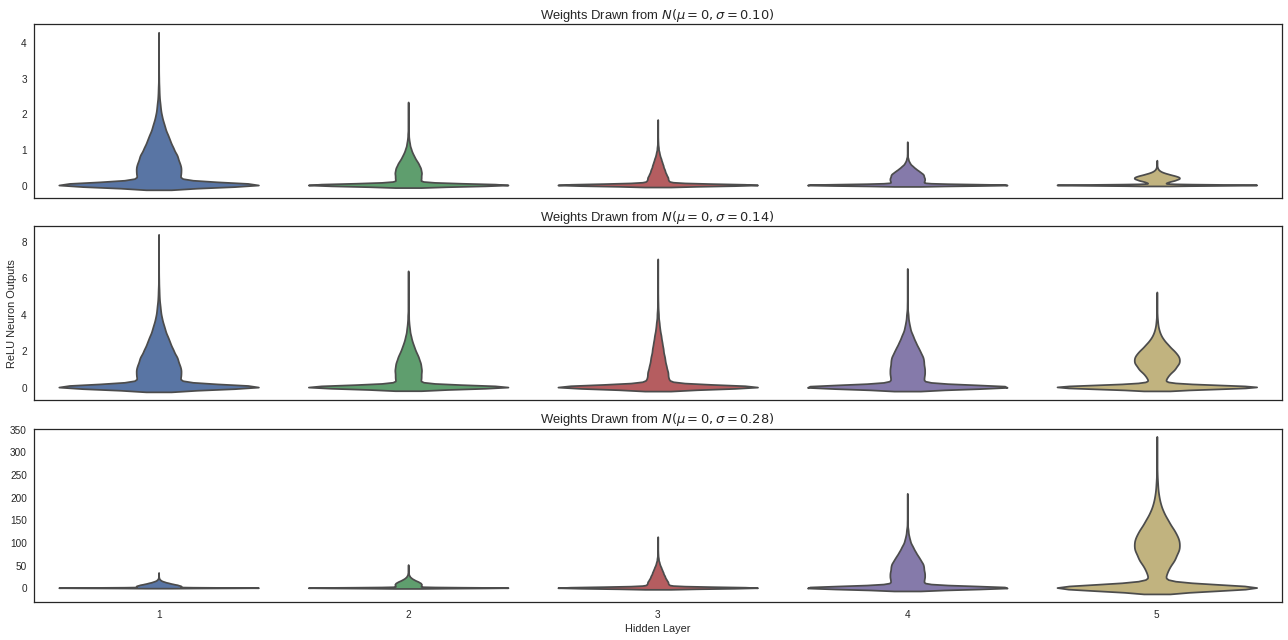

In [55]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18,9))
axes = grid_axes_it(len(sigmas),1, fig=fig)
for sig in sigmas:
  ax = next(axes)
  ddf = df[df['Standard Deviation']==sig]
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count',inner=None)
  
  ax.set_xlabel('')
  ax.set_ylabel('')
  
  ax.set_title('Weights Drawn from $N(\mu=0, \sigma={%.2f})$' % sig, fontsize=13)
  
  if sig == sigmas[1]:
    ax.set_ylabel("ReLU Neuron Outputs")
  if sig != sigmas[-1]:
    ax.set_xticklabels(())
  else:
    ax.set_xlabel("Hidden Layer")
    
    
plt.tight_layout()
plt.show()



---



---



## Plot Loss Compare of using diffrent settings weights

In [0]:
%matplotlib inline
plt.style.use('seaborn-white')
sns.set_palette('colorblind')

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [60]:
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
inits = [
    initializers.Zeros(),
    initializers.RandomNormal(mean=0.0, stddev=0.4, seed=10),
    initializers.RandomNormal(mean=0.0, stddev=0.1, seed=10),
    initializers.VarianceScaling(scale=2.0,
                                mode='fan_in',
                                distribution='normal',
                                seed = 10),
]

loss_histories = {}
models = {}

In [94]:
for i, init in enumerate(inits):
  init_id = get_init_id(init)
  print("Training CNN with initializers:")
  print(' ' + str(init))
  print(' ' + str(init.get_config()))
  
  model = create_cnn_model(input_shape, num_classes, kernel_initializer=init)
  compile_model(model)
  
  loss_history = LossHistory()
  model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test,y_test),
           callbacks=[loss_history])
  losses = loss_history.losses
  
  loss_histories[init_id] = loss_history
  models[init_id] = model

Training CNN with initializers:
 {}
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 200us/step - loss: 2.3017 - acc: 0.1119 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 10s 173us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/12
 2048/60000 [>.............................] - ETA: 9s - loss: 2.3027 - acc: 0.1060

60000/60000 [==============================] - 10s 175us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 11s 175us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/12
52608/60000 [=========================>....] - ETA: 1s - loss: 2.3013 - acc: 0.1121

60000/60000 [==============================] - 11s 176us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 11s 177us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 11s 175us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 8/12
 2432/60000 [>.............................] - ETA: 9s - loss: 2.3005 - acc: 0.1086

60000/60000 [==============================] - 11s 176us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 9/12
60000/60000 [==============================] - 11s 176us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 10/12
53120/60000 [=========================>....] - ETA: 1s - loss: 2.3013 - acc: 0.1122

60000/60000 [==============================] - 10s 174us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 11/12
60000/60000 [==============================] - 11s 175us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 12/12
60000/60000 [==============================] - 11s 176us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Training CNN with initializers:
 {'mean': 0.0, 'stddev': 0.4, 'seed': 10}
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 1280/60000 [..............................] - ETA: 1:13 - loss: 14.1639 - acc: 0.1195

60000/60000 [==============================] - 12s 202us/step - loss: 11.1577 - acc: 0.3031 - val_loss: 5.9029 - val_acc: 0.6294
Epoch 2/12
60000/60000 [==============================] - 11s 178us/step - loss: 7.2970 - acc: 0.5427 - val_loss: 4.6929 - val_acc: 0.7059
Epoch 3/12
49664/60000 [=======================>......] - ETA: 1s - loss: 6.0289 - acc: 0.6212

60000/60000 [==============================] - 11s 176us/step - loss: 5.9493 - acc: 0.6262 - val_loss: 3.7638 - val_acc: 0.7622
Epoch 4/12
60000/60000 [==============================] - 11s 177us/step - loss: 4.9877 - acc: 0.6853 - val_loss: 3.0372 - val_acc: 0.8081
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 4.3163 - acc: 0.7268 - val_loss: 2.7784 - val_acc: 0.8238
Epoch 6/12
 2048/60000 [>.............................] - ETA: 10s - loss: 4.3282 - acc: 0.7256

60000/60000 [==============================] - 11s 177us/step - loss: 3.8416 - acc: 0.7568 - val_loss: 2.5580 - val_acc: 0.8387
Epoch 7/12
60000/60000 [==============================] - 11s 178us/step - loss: 3.5518 - acc: 0.7747 - val_loss: 1.5848 - val_acc: 0.8964
Epoch 8/12
52864/60000 [=========================>....] - ETA: 1s - loss: 2.7035 - acc: 0.8259

60000/60000 [==============================] - 11s 177us/step - loss: 2.6591 - acc: 0.8286 - val_loss: 1.0492 - val_acc: 0.9316
Epoch 9/12
60000/60000 [==============================] - 11s 176us/step - loss: 2.1235 - acc: 0.8621 - val_loss: 0.8942 - val_acc: 0.9413
Epoch 10/12
60000/60000 [==============================] - 11s 175us/step - loss: 1.8528 - acc: 0.8794 - val_loss: 0.8605 - val_acc: 0.9444
Epoch 11/12
 3584/60000 [>.............................] - ETA: 9s - loss: 1.8016 - acc: 0.8839

60000/60000 [==============================] - 11s 177us/step - loss: 1.6794 - acc: 0.8903 - val_loss: 0.7550 - val_acc: 0.9507
Epoch 12/12
60000/60000 [==============================] - 11s 176us/step - loss: 1.5240 - acc: 0.8998 - val_loss: 0.7029 - val_acc: 0.9541
Training CNN with initializers:
 {'mean': 0.0, 'stddev': 0.1, 'seed': 10}
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
33920/60000 [===============>..............] - ETA: 5s - loss: 0.4262 - acc: 0.8674

60000/60000 [==============================] - 12s 204us/step - loss: 0.3061 - acc: 0.9059 - val_loss: 0.0618 - val_acc: 0.9789
Epoch 2/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.1014 - acc: 0.9700 - val_loss: 0.0434 - val_acc: 0.9868
Epoch 3/12
55552/60000 [==========================>...] - ETA: 0s - loss: 0.0731 - acc: 0.9777

60000/60000 [==============================] - 11s 178us/step - loss: 0.0723 - acc: 0.9782 - val_loss: 0.0368 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0598 - acc: 0.9826 - val_loss: 0.0345 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0533 - acc: 0.9841 - val_loss: 0.0349 - val_acc: 0.9889
Epoch 6/12
 3456/60000 [>.............................] - ETA: 9s - loss: 0.0514 - acc: 0.9812

60000/60000 [==============================] - 10s 174us/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0438 - val_acc: 0.9862
Epoch 7/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.0455 - acc: 0.9864 - val_loss: 0.0306 - val_acc: 0.9909
Epoch 8/12
52096/60000 [=========================>....] - ETA: 1s - loss: 0.0446 - acc: 0.9870

60000/60000 [==============================] - 11s 176us/step - loss: 0.0465 - acc: 0.9866 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 9/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0438 - acc: 0.9872 - val_loss: 0.0314 - val_acc: 0.9909
Epoch 10/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0492 - val_acc: 0.9908
Epoch 11/12
 2816/60000 [>.............................] - ETA: 9s - loss: 0.0382 - acc: 0.9901

60000/60000 [==============================] - 11s 175us/step - loss: 0.0444 - acc: 0.9881 - val_loss: 0.0351 - val_acc: 0.9904
Epoch 12/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0439 - acc: 0.9879 - val_loss: 0.0389 - val_acc: 0.9901
Training CNN with initializers:
 {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'normal', 'seed': 10}
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
32768/60000 [===============>..............] - ETA: 5s - loss: 0.3696 - acc: 0.8931

60000/60000 [==============================] - 12s 202us/step - loss: 0.2570 - acc: 0.9260 - val_loss: 0.0505 - val_acc: 0.9827
Epoch 2/12
60000/60000 [==============================] - 10s 175us/step - loss: 0.0814 - acc: 0.9757 - val_loss: 0.0462 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0628 - acc: 0.9819 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 4/12
  512/60000 [..............................] - ETA: 10s - loss: 0.0451 - acc: 0.9883

60000/60000 [==============================] - 11s 176us/step - loss: 0.0543 - acc: 0.9849 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0481 - acc: 0.9856 - val_loss: 0.0307 - val_acc: 0.9904
Epoch 6/12
52352/60000 [=========================>....] - ETA: 1s - loss: 0.0446 - acc: 0.9870

60000/60000 [==============================] - 11s 176us/step - loss: 0.0452 - acc: 0.9867 - val_loss: 0.0306 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0444 - acc: 0.9867 - val_loss: 0.0380 - val_acc: 0.9901
Epoch 8/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.0435 - acc: 0.9882 - val_loss: 0.0367 - val_acc: 0.9890
Epoch 9/12
 2816/60000 [>.............................] - ETA: 9s - loss: 0.0469 - acc: 0.9869

60000/60000 [==============================] - 11s 175us/step - loss: 0.0451 - acc: 0.9872 - val_loss: 0.0378 - val_acc: 0.9900
Epoch 10/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0467 - acc: 0.9874 - val_loss: 0.0300 - val_acc: 0.9911
Epoch 11/12
52736/60000 [=========================>....] - ETA: 1s - loss: 0.0468 - acc: 0.9872

60000/60000 [==============================] - 11s 176us/step - loss: 0.0472 - acc: 0.9871 - val_loss: 0.0361 - val_acc: 0.9910
Epoch 12/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0454 - acc: 0.9875 - val_loss: 0.0414 - val_acc: 0.9890


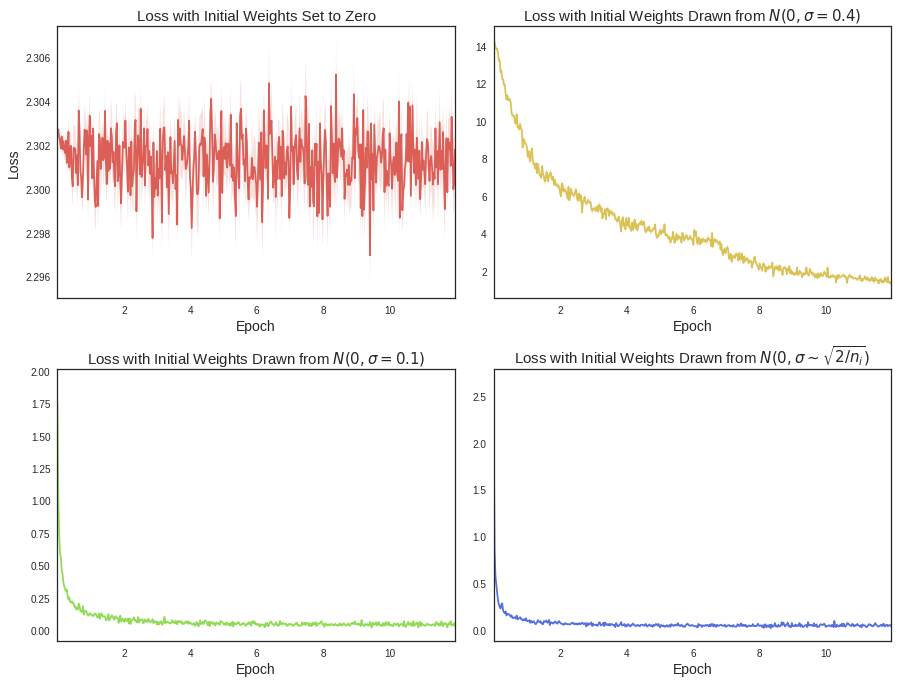

In [95]:
# Plot the loss over time for three initialization schemes.
colors = sns.color_palette('hls', 8)
cases = [
    (
        'Zeros|',
        'Loss with Initial Weights Set to Zero',
        colors[0],
    ),
    (
        'RandomNormal|mean-0.0__stddev-0.4',
        'Loss with Initial Weights Drawn from $N(0, \sigma = 0.4)$',
        colors[1],
    ),
    (
        'RandomNormal|mean-0.0__stddev-0.1',
        'Loss with Initial Weights Drawn from $N(0, \sigma = 0.1)$',
        colors[2],
    ),
   (
        'VarianceScaling|scale-2.0__mode-fan_in__distribution-normal',
        'Loss with Initial Weights Drawn from $N(0, \sigma \sim \sqrt{2/n_i})$',
        colors[5],
    ),
    
]

plt.figure(figsize=(9, 6))
axes = grid_axes_it(4,2)

for i, (case_id, label, color) in enumerate(cases):
    ax = next(axes)
    case_loss = loss_histories[case_id].losses
    n_steps = 12
    pseqs = []
    for step in range(n_steps):
        seq = [float(x) for x in case_loss[step::n_steps]]
        pseqs.append(seq)

    mlen = max([len(x) for x in pseqs])
    seqs = [np.array(seq[:mlen]) for seq in pseqs]

    sns.tsplot(np.array(seqs), ax=ax, color=color)

    # These plotting methos assume that there are 12 epochs to correctly draw xticks.
    assert epochs == 12

    def get_label(x):
        if x == 0.0:
            return ''
        else:
            return str(int(x / len(seqs[0]) * 12))

    xticks = [x * len(seq) / 6.0 for x in range(6)]
    ax.set_xticks(xticks)
    ax.set_xticklabels([get_label(x) for x in xticks])

    if i < 100:
        ax.set_xlabel("Epoch", fontsize=14)
    if i == 0:
        ax.set_ylabel("Loss", fontsize=14)
    ax.set_title(label, fontsize=15)


plt.tight_layout()
plt.show()